# VDI Python Notebook Example
NCI Virtual Desktop Training -- January 2016 -- Geoscience Australia


#### Objectives of this simple demo:
- Launch jupyter (ipython) notebook from VDI
- Access netCDF data directly from /g/data  
- Access netCDF data using OPeNDAP


### Import libraries

In [1]:
# Only 2 required for this demo
from netCDF4 import Dataset
import matplotlib.pyplot as plt

### Accessing a file directly on /g/data
- Note: This does not yet load/extract data

In [2]:
f = Dataset('/g/data/rr5/satellite/obs/himawari8/FLDK/2016/01/03/0030/20160103003000-P1S-ABOM_BRF_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc', 'r')

#### Can use the netCDF4 library to see information about the file

In [3]:
## Display dimensions for file
for item in f.dimensions:
    print item, f.dimensions[item]

time <type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1

y <type 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 5500

x <type 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 5500



In [4]:
## Look at variables
vars = f.variables.keys()
for item in vars:
    print 'Variable: \t', item
    print 'Dimensions: \t', f[item].dimensions
    print 'Shape:    \t', f[item].shape, '\n'

Variable: 	time
Dimensions: 	(u'time',)
Shape:    	(1,) 

Variable: 	y
Dimensions: 	(u'y',)
Shape:    	(5500,) 

Variable: 	x
Dimensions: 	(u'x',)
Shape:    	(5500,) 

Variable: 	geostationary
Dimensions: 	()
Shape:    	() 

Variable: 	scan_line_time
Dimensions: 	(u'y',)
Shape:    	(5500,) 

Variable: 	channel_0002_brf
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(1, 5500, 5500) 



#### Extracting data
- A really nice feature of netCDF/HDF files is that you can extract subsets without having to load entire file into memory

In [10]:
## %%timeit

i1 = 1000
i2 = 4000
ch02 = f['channel_0002_brf'][0, i1:i2, i1:i2]
y = f.variables['y'][i1:i2]
x = f.variables['x'][i1:i2]


In [11]:
type (x)

numpy.ndarray

#### Plotting

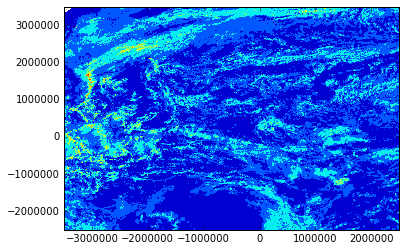

In [12]:
%matplotlib inline 
plt.contourf(x, y, ch02)

### Accessing a file using OPeNDAP
- Advantage: If dataset available, you can access from anywhere just as you'd call a local file. 
- Disadvantage: Not as fast as having the file locally. 

Note: You can see how fast the data extraction was with the '%%timeit' function in the cell above and compare it to the length of time OPeNDAP method takes in the cell below. 

In [13]:
f = Dataset('http://dapds00.nci.org.au/thredds/dodsC/rr5/satellite/obs/himawari8/FLDK/2016/01/03/0030/20160103003000-P1S-ABOM_BRF_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc', 'r')

#### After opening the file with the OPeNDAP address, the file can be handled no differently to the above in situ example. 

In [14]:
## Display dimensions for file
for item in f.dimensions:
    print item, f.dimensions[item]

time <type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1

x <type 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 5500

y <type 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 5500



In [15]:
##    %%timeit

i1 = 1000
i2 = 4000
ch02 = f['channel_0002_brf'][0, i1:i2, i1:i2]
y = f.variables['y'][i1:i2]
x = f.variables['x'][i1:i2]

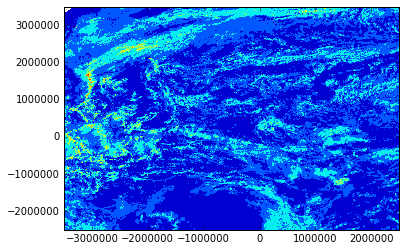

In [16]:
%matplotlib inline 
plt.contourf(x, y, ch02)

In [26]:
print f.Metadata_Conventions, f.netCDF_version, f.geospatial_lat_max, f.geospatial_lat_units

attrib=f.ncattrs

print type(attrib)

Unidata Dataset Discovery v1.0 4.3.0 of Jun 26 2013 11:46:12 $ 79.2637 degree_north
<type 'builtin_function_or_method'>
